In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

In [2]:
# Load your dataset
df = pd.read_csv("descriptor.csv")  # Adjust path

In [3]:
features = ['SlogP_VSA5', 'BCUT2D_CHGHI', 'SMR_VSA5', 'MinEStateIndex', 'Chi4v','Prot_MW', 'Aromaticity', 'Instability', 'Hydropathy','IsoelectricPoint']
target = 'Kd'

X = df[features]
y = df[target]


In [4]:
# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [5]:
# Create and train pipeline
baseline_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))
])

In [6]:
baseline_pipeline.fit(X_train, y_train)
preds = baseline_pipeline.predict(X_val)

In [7]:
# Evaluate
mse = mean_squared_error(y_val, preds)
print(f"Baseline RandomForest MSE: {mse:.4f}")

Baseline RandomForest MSE: 1.5064


In [8]:
# Save the baseline model
joblib.dump(baseline_pipeline, "baseline_rf_model.pkl")

['baseline_rf_model.pkl']

In [9]:
test_df = pd.read_csv("descriptor_test.csv")
x_test = test_df.drop("Kd", axis=1)
y_test = test_df['Kd']

model = joblib.load("baseline_rf_model.pkl")
y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error , root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

Mean Squared Error: 1.5722
Mean Absolute Error: 0.9643
Root Mean Squared Error: 1.2539


C:\Users\NongNam\AppData\Local\Temp\ipykernel_1452\897430231.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label="True Kd", shade=True)
C:\Users\NongNam\AppData\Local\Temp\ipykernel_1452\897430231.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label="Predicted Kd", shade=True)


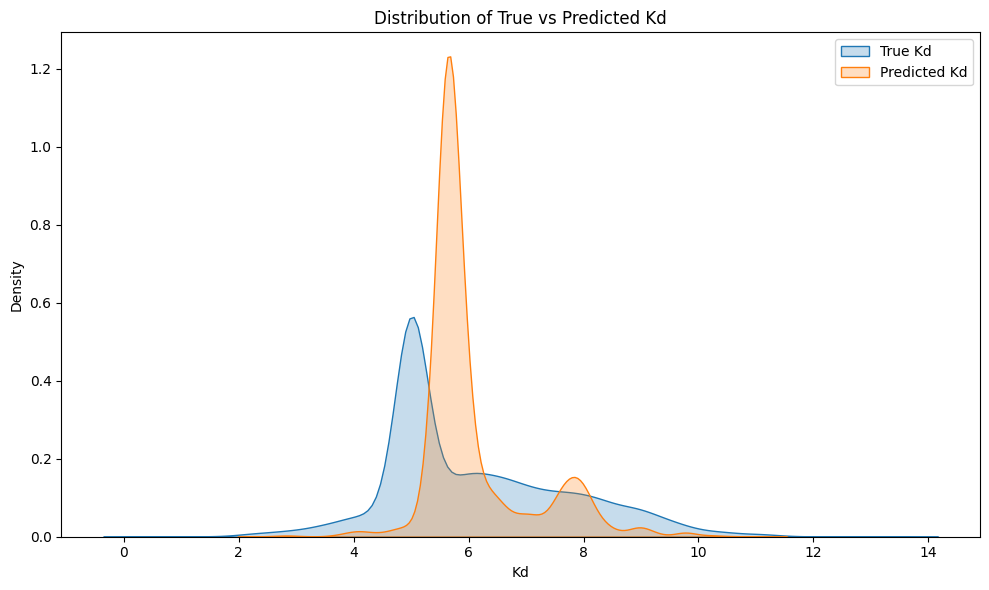

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot real vs predicted distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label="True Kd", shade=True)
sns.kdeplot(y_pred, label="Predicted Kd", shade=True)
plt.title("Distribution of True vs Predicted Kd")
plt.xlabel("Kd")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()